# Random_Forest Classification Tutorial
Generated: 2025-09-13T01:20:38

This notebook shows a complete, minimal workflow for **Random_Forest** on a synthetic binary classification dataset with 12 features.

**What you'll do:**
1. Load the dataset (`rf_data.csv`) with feature columns (`f1..f4`, `f8..f12`) and a `target` (0/1), removing `f5`, `f6`, and `f7`.
2. Explore shapes and basic stats.
3. Train/validation split.
4. Preprocess (scaling where appropriate).
5. Train a Random_Forest classifier with reasonable defaults.
6. Evaluate with accuracy, precision, recall, F1, confusion matrix, ROC-AUC.
7. Save the fitted model (optional).


In [20]:
# Setup
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay

import matplotlib.pyplot as plt

# Load data
data_path = "../datasets/rf_data.csv"
df = pd.read_csv(data_path)

print("Shape:", df.shape)
df.head()

Shape: (800, 13)


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,target
0,0.064158,0.643436,-0.116613,-3.930766,-0.876913,3.329931,0.821510,-0.887043,0.364875,2.062348,-0.973381,-1.835838,0
1,2.334526,-2.090979,2.863759,-1.057278,1.519804,0.689141,-0.271289,-1.352438,-3.257142,3.604434,1.879144,-1.756925,0
2,-0.055248,1.342512,-2.668722,-0.924393,1.975963,7.456449,0.751483,-0.582545,-0.931834,3.237535,-1.047953,-0.816826,0
3,-1.004273,1.686469,-1.635486,-1.209205,0.490510,5.576028,-0.532679,-0.359932,0.600588,3.142366,-1.837934,-0.115482,0
4,-1.031121,-0.268962,-0.559229,-1.524212,-1.047046,0.247808,0.383200,-1.833488,2.450544,-1.073923,0.232561,-3.440025,0


In [21]:
# Basic EDA
print(df.describe().T)
print("\nClass distribution:\n", df['target'].value_counts(normalize=True).rename('proportion'))

        count      mean       std       min       25%       50%       75%  \
f1      800.0 -0.045179  0.981126 -2.712649 -0.737013 -0.021858  0.608768   
f2      800.0  0.209157  2.060820 -6.761401 -1.253276  0.107035  1.608137   
f3      800.0 -0.620926  1.974062 -5.533230 -2.064046 -0.727003  0.895485   
f4      800.0 -0.635029  1.955702 -6.225940 -1.976513 -0.726904  0.731267   
f5      800.0 -0.049397  1.981277 -5.751637 -1.389944  0.192621  1.386933   
f6      800.0  1.857155  2.938318 -7.378366  0.126764  1.984840  3.787977   
f7      800.0 -0.000519  0.994062 -2.843389 -0.668581 -0.014159  0.695225   
f8      800.0 -0.645795  1.936328 -5.610250 -1.981746 -0.734794  0.640068   
f9      800.0  0.592416  1.980668 -5.757626 -0.668891  0.712932  1.954169   
f10     800.0  1.136592  1.692773 -3.443793 -0.036962  1.137130  2.316004   
f11     800.0 -0.743235  2.431158 -8.289013 -2.378517 -0.796776  0.860669   
f12     800.0 -0.576695  1.832434 -6.135099 -1.798390 -0.678260  0.666790   

In [22]:
# Train/Validation split
X = df.drop(columns=['target', 'f5', 'f6', 'f7'])
y = df['target']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=123, stratify=y
)

X_train.shape, X_val.shape

((640, 9), (160, 9))

In [23]:
# Random Forest (ensemble of decision trees)
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=10,
    random_state=123,
    n_jobs=-1
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
y_proba = clf.predict_proba(X_val)[:, 1]

Accuracy : 0.894
Precision: 0.922
Recall   : 0.831
F1-score : 0.874
ROC AUC  : 0.953

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91        89
           1       0.92      0.83      0.87        71

    accuracy                           0.89       160
   macro avg       0.90      0.89      0.89       160
weighted avg       0.90      0.89      0.89       160


Confusion Matrix:
 [[84  5]
 [12 59]]


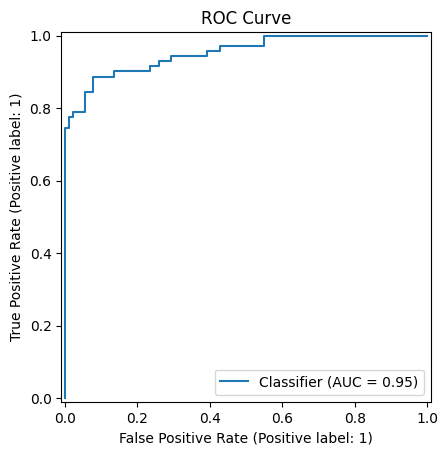

In [24]:
# Evaluation
acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred)
rec = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_proba)

print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-score : {f1:.3f}")
print(f"ROC AUC  : {auc:.3f}")

print("\nClassification Report:\n", classification_report(y_val, y_pred))

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
print("\nConfusion Matrix:\n", cm)

# ROC Curve (uses matplotlib; no style or color specified)
RocCurveDisplay.from_predictions(y_val, y_proba)
plt.title("ROC Curve")
plt.show()

In [25]:
# (Optional) Save model with joblib for later reuse
# Uncomment to persist
# import joblib
# joblib.dump(clf if 'clf' in globals() else pipe, "model.joblib")
